# ***Kunskapskontroll_3***

### Exploratory Data Analysis ***(EDA)*** on dataset "housing.csv"

In this EDA, I analyze the housing dataset to understand which factors affect the house prices.
The goal is to identify patterns, relationships, and potential data issues, as well as to answer questions such as:

   * Which areas are more expensive or cheaper?
   * Which factors have the greatest impact on house prices?
   *  Are there missing values, and do they need to be handled?"

# EDA

### Import libraries and load the dataset.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


# Read dataset housing and stores it in dataframe called df
df = pd.read_csv("housing.csv")


### Quickly see what the data looks like

In [3]:
# Look at first 10 rows of data and what column names are there. Which variables are targeted
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### How big is the dataset?

In [4]:
# To look how big the dataset is. It shows total rows and columns in data
print("Shape of data: ", df.shape)

# 20,640 rows and 10 columns

Shape of data:  (20640, 10)


### Data information

In [23]:
# To see what data type of variables are there
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Descriptive statistics

In [25]:
# Summary of numerical data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Is there any null values?

In [16]:
# Check if there are any missing values
df.isnull().sum()

# 207 values of variable total_bedrooms are missing

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Fixing null values

In [11]:
imp = SimpleImputer(strategy='median')
num = df.select_dtypes(include=np.number).columns
df[num] = imp.fit_transform(df[num])

df.info()
df.isnull().sum()

# No more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Data Visualization

### Average House Price by Ocean Proximity using bar chart:

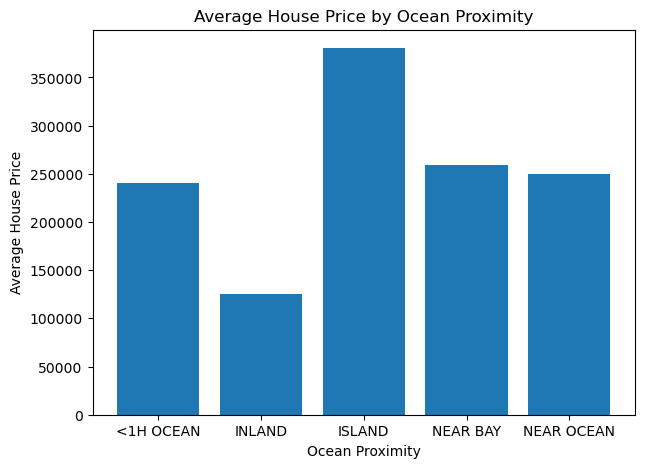

In [20]:
# Calculate average house price per category
avg_prices = df.groupby('ocean_proximity')['median_house_value'].mean()

# Plot bar chart
plt.figure(figsize=(7, 5))
plt.bar(avg_prices.index, avg_prices.values)
plt.xlabel("Ocean Proximity")
plt.ylabel("Average House Price")
plt.title("Average House Price by Ocean Proximity")
plt.show()


Average House Price by Ocean Proximity: 
    Bar height shows the average house price for each ocean proximity category. 
    Houses near the ocean, bay and islands are more expensive than inland houses, which confirms that location strongly affects house prices.

## Income vs House Price

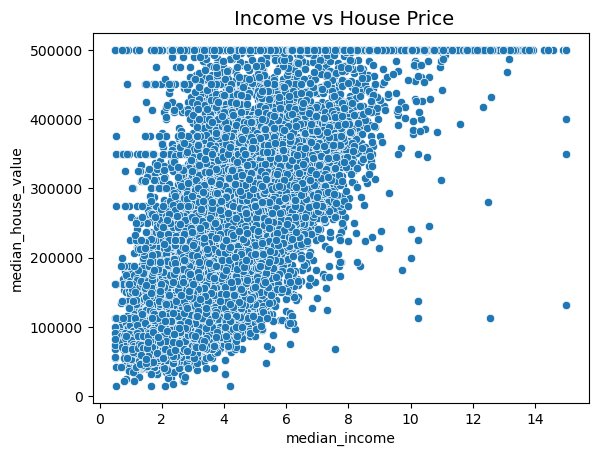

In [7]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title(' Income vs House Price', fontsize=14)
plt.show()

# There is a clear positive relationship

Income vs House Price:
    As median income increases, median house value also increases.
    There is a clear positive relationship between income and house price. This means income affects house prices.

## Ocean proximity vs price

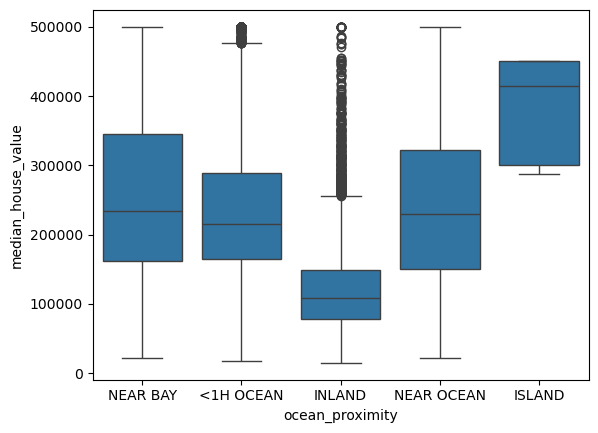

In [16]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.show()

Ocean proximity vs price:
    Houses near the ocean are more expensive. INLAND houses are much cheaper. Location strongly affects price.

### Geographical position (Latitude/Longitude vs  Median House Value)

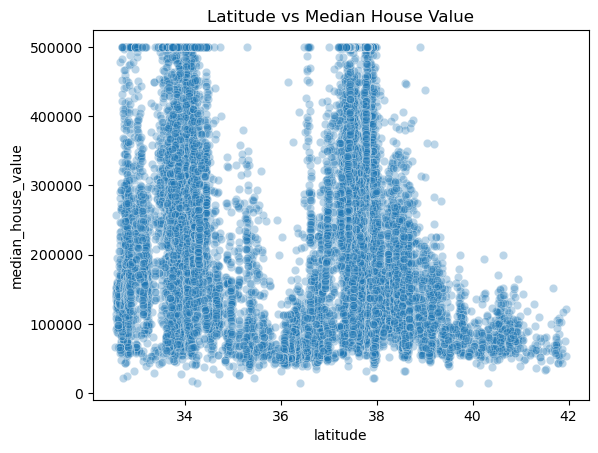

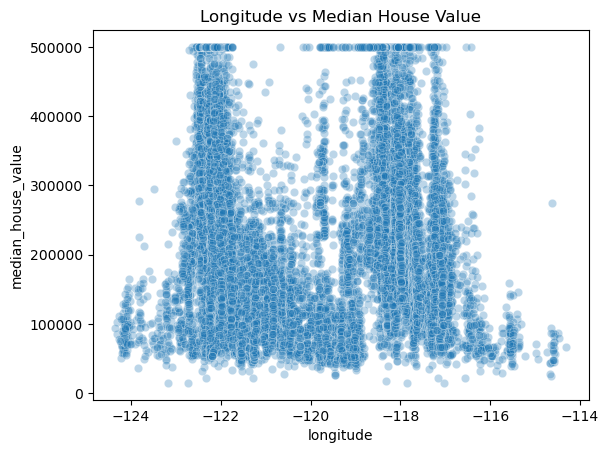

In [10]:
sns.scatterplot(x='latitude', y='median_house_value', data=df, alpha=0.3)
plt.title('Latitude vs Median House Value')
plt.show()

#Longitude vs House Price
sns.scatterplot(x='longitude', y='median_house_value', data=df, alpha=0.3)
plt.title('Longitude vs Median House Value')
plt.show()

Geographical position:
    House prices vary depending on geographical location. Certain latitude/longitude ranges have consistently higher prices, which shows that geographical position affects prices.

### Housing age vs House Price

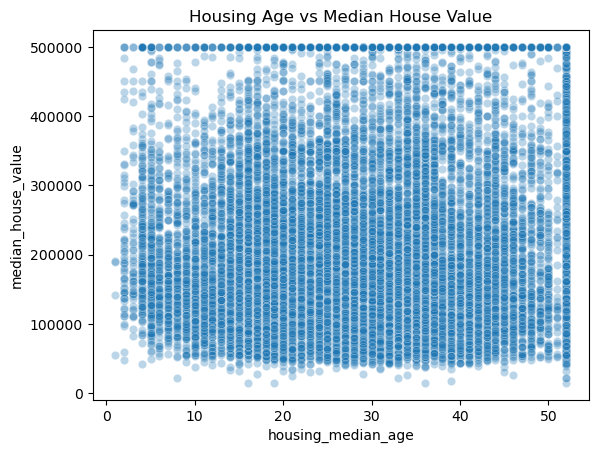

In [11]:
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df, alpha=0.3)
plt.title('Housing Age vs Median House Value')
plt.show()

Housing age vs House Price:
    Some older neighborhoods have higher prices. The relationship is weaker. Housing age is not the strongest factor.

### Total Rooms vs House Price

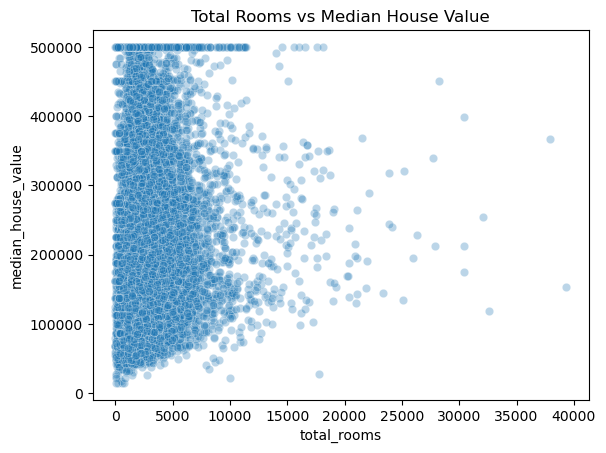

In [14]:
sns.scatterplot(x='total_rooms', y='median_house_value', data=df, alpha=0.3)
plt.title('Total Rooms vs Median House Value')
plt.show()


Total Rooms vs House Price:
    Larger houses tend to be more expensive. There is a weak relationship. 
    Size-related variables affect prices, but less than income and location.

### Correlation heatmap

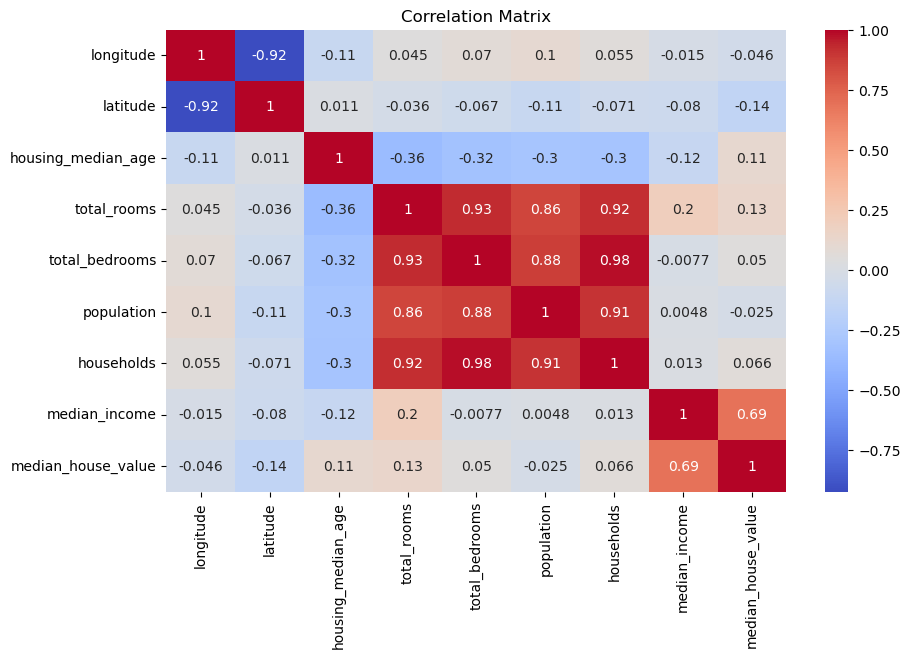

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation:
* Median income has the strongest correlation (1).
* Latitude and longitude has strong negative correlation (-1).
* Age, and size show weaker relationships.

### Conclusion av EDA

The dataset 'housing.csv' is large and mostly clean. Missing values exist but are manageable. Visual analysis shows that geographical position, housing age, and housing size-related variables all affect house prices. Income and location are the most important factors. Coastal and high-income areas have higher house prices. Location has a clearer impact than housing age and size, while median income remains the strongest influencing factor.

### Självutvärdering

 
### 1. Har något varit utmanande i kursen/kunskapskontrollerna? Om ja, hur har du hanterat det? Vilka lärdomar tar du med dig till framtida kurser?      
Eftersom jag tidigare bara hade grundläggande kunskaper i Python har arbetet med Pandas, NumPy och Matplotlib gett mig en bättre förståelse för dataanalys och väckt ett intresse för att lära mig mer om AI och data science.      
En utmaning i kursen var att förstå hur man genomför en Exploratory Data Analysis (EDA) på ett strukturerat sätt. Jag hanterade detta genom att öva steg för steg, läsa exempel och arbeta praktiskt i Jupyter Notebook. 

### 2. Vilket betyg anser du att du ska ha och varför?    
Jag anser att jag bör få betyget VG, eftersom jag har genomfört en komplett och välstrukturerad EDA. Jag har tydligt förklarat varje steg, hanterat saknade värden, skapat flera visualiseringar och tolkat resultaten på ett meningsfullt sätt.

  
### 3. Något du vill lyfta fram till Terese?   
Krsen har varit lärorik och praktisk. Uppgifterna har hjälpt mig att förstå hur Python och dataanalys används i verkliga situationer. Tack för tydliga instruktioner och bra stöd under kursens gång.  
